In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import warnings
import seaborn as sns

In [2]:
df = pd.read_csv("WDI_csv/WDIData.csv").iloc[:, :-1]

# country_df only contains countries, excludes Arab World, Continents and so on...
country_df = df.iloc[67400:]

In [3]:
grps = df.groupby(["Country Code", "Indicator Code"])

In [ ]:
grps.groups

{('ABW', 'AG.AGR.TRAC.NO'): [80364], ('ABW', 'AG.CON.FERT.PT.ZS'): [80724], ('ABW', 'AG.CON.FERT.ZS'): [80725], ('ABW', 'AG.LND.AGRI.K2'): [80363], ('ABW', 'AG.LND.AGRI.ZS'): [80362], ('ABW', 'AG.LND.ARBL.HA'): [80395], ('ABW', 'AG.LND.ARBL.HA.PC'): [80394], ('ABW', 'AG.LND.ARBL.ZS'): [80393], ('ABW', 'AG.LND.CREL.HA'): [80993], ('ABW', 'AG.LND.CROP.ZS'): [81278], ('ABW', 'AG.LND.EL5M.RU.K2'): [81491], ('ABW', 'AG.LND.EL5M.RU.ZS'): [81490], ('ABW', 'AG.LND.EL5M.UR.K2'): [81707], ('ABW', 'AG.LND.EL5M.UR.ZS'): [81706], ('ABW', 'AG.LND.EL5M.ZS'): [80992], ('ABW', 'AG.LND.FRST.K2'): [80762], ('ABW', 'AG.LND.FRST.ZS'): [80761], ('ABW', 'AG.LND.IRIG.AG.ZS'): [80361], ('ABW', 'AG.LND.PRCP.MM'): [80403], ('ABW', 'AG.LND.TOTL.K2'): [80991], ('ABW', 'AG.LND.TOTL.RU.K2'): [81489], ('ABW', 'AG.LND.TOTL.UR.K2'): [81705], ('ABW', 'AG.LND.TRAC.ZS'): [80365], ('ABW', 'AG.PRD.CREL.MT'): [80443], ('ABW', 'AG.PRD.CROP.XD'): [80585], ('ABW', 'AG.PRD.FOOD.XD'): [80754], ('ABW', 'AG.PRD.LVSK.XD'): [81012], 

In [ ]:
# grps.agg(lambda x: 100 * sum(x.isnull()) / len(x)).plot.box()

In [ ]:
nan_df = pd.DataFrame()
for col in df:
  nan_df[col] = [sum(df[col].isnull()) / len(df[col]) * 100]
nan_df = nan_df.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])

<AxesSubplot:xlabel='Year', ylabel='Missing Values %'>

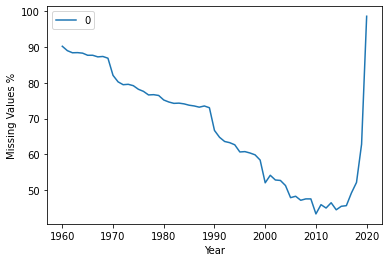

In [ ]:
nan_df.T.plot.line(xlabel="Year", ylabel="Missing Values %")

In [ ]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378571,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN
378572,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.4,NaN
378573,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.500000,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.7,NaN
378574,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.000000,59.200000,59.300000,59.400000,59.400000,59.500000,59.500000,59.600000,59.6,NaN


In [4]:
def get_indicator_data(df: pd.DataFrame, indicator_code: str):
    return df[df["Indicator Code"] == indicator_code]\
        .drop(columns=["Indicator Code", "Indicator Name", "Country Name"])\
        .set_index("Country Code")

In [5]:
def get_country_data(df: pd.DataFrame, country_code: str):
    return df[df["Country Code"] == country_code]\
        .drop(columns=["Country Code", "Country Name", "Indicator Name"])\
        .set_index("Indicator Code")

In [6]:
def get_year_data(df: pd.DataFrame, year: str):
    new_df = df[["Country Code", "Indicator Code", year]]
    ret_df = pd.DataFrame()
    for indicator_code, indicator_df in new_df.groupby("Indicator Code"):
        series = indicator_df.set_index("Country Code")[year]
        ret_df[indicator_code] = series
    return ret_df

In [7]:
def get_indicator_name(df, indicator_code):
  # Very, very inefficient. Fix by keeping a mapping of code to name
  return df[df["Indicator Code"] == indicator_code]["Indicator Name"].iloc[0]

In [8]:
def get_country_name(df, country_code):
  # Very, very inefficient. Fix by keeping a mapping of code to name
  return df[df["Country Code"] == country_code]["Country Name"].iloc[0]

In [ ]:
get_year_data(df, "2018")

,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Code,,,,,,,,,,,,,,,,,,,,,
ARB,NaN,NaN,NaN,NaN,NaN,NaN,0.140368,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSS,NaN,NaN,NaN,NaN,NaN,NaN,0.102596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEB,NaN,NaN,NaN,NaN,NaN,NaN,0.355118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EAR,NaN,NaN,NaN,NaN,NaN,NaN,0.134060,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EAS,NaN,NaN,NaN,NaN,NaN,NaN,0.100765,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIR,NaN,NaN,NaN,NaN,NaN,NaN,0.009348,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,0.038518,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def filter_df(df, ge_year=None, le_year=None, nan_thresh=None, particular_year = None):
  if nan_thresh is not None:
    na_kwargs = {"thresh": nan_thresh}
  else:
    na_kwargs = {}
  df = df.dropna(axis=0, how='all').dropna(axis=1, how='all').dropna(axis=1, **na_kwargs).iloc[:, :-1]
  if ge_year is not None:
    df = df.loc[:, df.columns >= ge_year]
  if le_year is not None:
    df = df.loc[:, df.columns <= le_year]
  if particular_year is not None:
    df = df.loc[:, df.columns == particular_year]
  return df

In [10]:
import matplotlib.pyplot as plt

def plot_indicator_box_across_years(df, indicator_code, **kwargs):
  ind_df = filter_df(get_indicator_data(df, indicator_code), **kwargs)

  fig, ax = plt.subplots()
  ax.set_xlabel("Year")
  ax.set_ylabel(get_indicator_name(df, indicator_code))
  sns.boxplot(data=ind_df, ax=ax)

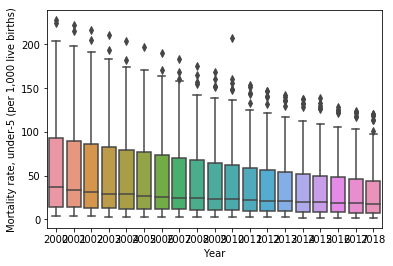

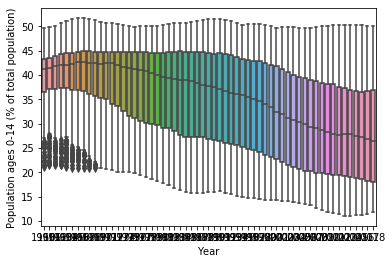

In [13]:
plot_indicator_box_across_years(df, "SH.DYN.MORT", ge_year="2000")
plot_indicator_box_across_years(df, "SP.POP.0014.TO.ZS", nan_thresh=220)

In [14]:
def plot_indicator_some_countries(df, indicator_code, countries, **kwargs):
  tmp = df.loc[(df["Country Code"].isin(countries)) & (df["Indicator Code"] == indicator_code)].set_index("Country Name").iloc[:, 3:]
  tmp = filter_df(tmp, **kwargs)

  fig, ax = plt.subplots()
  ax.set_xlabel("Year")
  ax.set_ylabel(get_indicator_name(df, indicator_code))
  sns.lineplot(data=tmp.T, ax=ax)

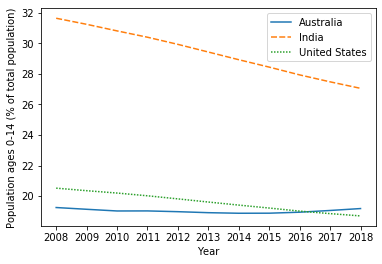

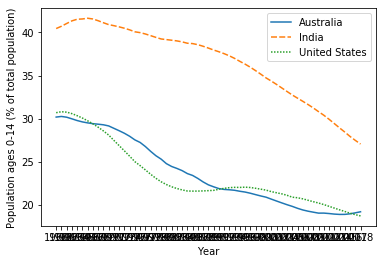

In [15]:
plot_indicator_some_countries(df, "SP.POP.0014.TO.ZS", ["IND", "USA", "AUS"], ge_year="2008")
plot_indicator_some_countries(df, "SP.POP.0014.TO.ZS", ["IND", "USA", "AUS"])

In [16]:
def plot_country_some_indicators(df, country_code, indicators, **kwargs):
  tmp = df.loc[(df["Country Code"] == country_code) & (df["Indicator Code"].isin(indicators))].set_index("Indicator Name").iloc[:, 3:]
  tmp = filter_df(tmp, **kwargs)
  tmp = (tmp - tmp.min()) / tmp.max() # Scale
  
  fig, ax = plt.subplots()
  ax.set_xlabel("Year")
  ax.set_ylabel(get_country_name(df, country_code))
  sns.lineplot(data=tmp.T, ax=ax)

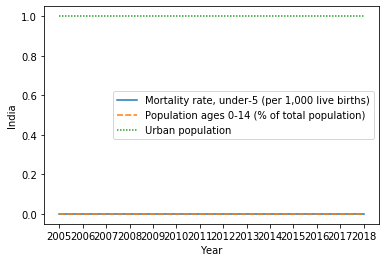

In [17]:
plot_country_some_indicators(df, "IND", ["SP.POP.0014.TO.ZS", "SP.URB.TOTL", "SH.DYN.MORT"], ge_year="2005")

In [18]:
df_RUS = get_country_data(df, "RUS")

In [19]:
df_RUS.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,9.100000e+01,9.500000e+01,9.700000e+01,9.500000e+01,9.600000e+01,9.700000e+01,9.600000e+01,9.700000e+01,9.500000e+01,9.900000e+01,...,9.110000e+02,9.590000e+02,9.370000e+02,1.014000e+03,9.810000e+02,9.760000e+02,9.230000e+02,8.570000e+02,6.980000e+02,2.800000e+01
mean,6.890104e+06,7.028857e+06,6.945928e+06,7.186371e+06,7.191098e+06,7.196619e+06,7.317071e+06,7.280702e+06,7.485296e+06,7.227475e+06,...,1.760427e+12,1.817167e+12,1.939313e+12,1.879226e+12,1.952745e+12,1.973706e+12,2.207174e+12,2.621061e+12,3.328150e+12,2.641498e+06
std,1.993424e+07,1.978860e+07,1.983107e+07,2.024248e+07,2.038918e+07,2.053919e+07,2.077493e+07,2.082671e+07,2.116774e+07,2.093472e+07,...,8.929270e+12,9.429771e+12,9.945075e+12,9.987680e+12,1.021242e+13,1.035849e+13,1.123202e+13,1.268613e+13,1.453656e+13,1.360274e+07
min,0.000000e+00,-8.426913e-01,-1.387844e+06,-9.105655e-01,-9.423210e-01,-9.690112e-01,-1.545326e+00,-5.497220e+05,-1.612326e+00,-1.635056e+00,...,-1.774673e+12,-2.086646e+12,-2.534373e+12,-2.608267e+12,-2.300325e+12,-2.380256e+12,-2.453507e+12,-2.531283e+12,-3.464826e+12,6.306273e-01
25%,5.344912e+00,5.706050e+00,5.340602e+00,5.907317e+00,5.901865e+00,4.934410e+00,5.892913e+00,5.802335e+00,6.181089e+00,5.144222e+00,...,7.262668e+00,6.213425e+00,6.244370e+00,5.499014e+00,6.200000e+00,5.517500e+00,5.381319e+00,5.047963e+00,6.175483e+00,7.239926e-01
50%,1.208235e+01,1.232251e+01,1.192006e+01,1.191147e+01,1.315260e+01,1.174104e+01,1.476065e+01,1.126419e+01,1.509800e+01,1.135664e+01,...,4.317613e+01,3.815561e+01,3.987000e+01,3.859740e+01,4.187000e+01,3.754500e+01,4.674280e+01,3.419260e+01,3.586042e+01,7.000000e+00
75%,7.319564e+01,1.005975e+02,7.792169e+01,1.007736e+02,1.194847e+02,7.884407e+01,1.595215e+02,7.945899e+01,9.936927e+01,7.614954e+01,...,1.945620e+06,4.682913e+05,4.216463e+05,2.212037e+04,5.863100e+04,5.427711e+04,1.245585e+05,6.947498e+05,7.123310e+07,6.500667e+01
max,1.198970e+08,1.212360e+08,1.225910e+08,1.239600e+08,1.253450e+08,1.267450e+08,1.274680e+08,1.281960e+08,1.289280e+08,1.296640e+08,...,9.498839e+13,9.926200e+13,9.934458e+13,9.857838e+13,8.951589e+13,8.561610e+13,9.184320e+13,1.046296e+14,1.100461e+14,7.202503e+07


In [20]:
df_RUS.kurtosis()

1960    13.673046
1961    14.074258
1962    14.453011
1963    14.120663
1964    14.327065
          ...    
2016    44.370967
2017    41.553938
2018    38.501144
2019    30.850038
2020    27.955444
Length: 61, dtype: float64

In [21]:
df_RUS.skew()

1960    3.533580
1961    3.558441
1962    3.604298
1963    3.566591
1964    3.594025
          ...   
2016    6.506924
2017    6.300617
2018    6.041276
2019    5.428596
2020    5.285514
Length: 61, dtype: float64

In [22]:
df_RUS.var()

1960    3.973739e+14
1961    3.915888e+14
1962    3.932715e+14
1963    4.097579e+14
1964    4.157185e+14
            ...     
2016    1.072984e+26
2017    1.261583e+26
2018    1.609380e+26
2019    2.113117e+26
2020    1.850345e+14
Length: 61, dtype: float64

### Best Fit Distribution, along with confidence interval

In [110]:
import matplotlib

colors = ['violet','cyan','green','brown','purple','red','yellowgreen','gray','blue','orange','indigo']

matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
matplotlib.style.use('ggplot')

def best_fit_distribution(data, bins=200, ax=None):
    
    # data is a numpy array. The list of distributions represent the potential candidates to be tried.
    
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [st.beta,st.cauchy,st.chi2,st.expon,st.logistic,st.gamma,st.lognorm,st.norm,st.uniform]
    
    number = len(DISTRIBUTIONS)
    
    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    
    if ax:
        ax.set_prop_cycle(color=colors)
    i = 0
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:
        #print(best_distribution.name,best_params,best_sse)
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label = distribution.name, color = colors[i])
                        i += 1
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """
    
    # Given the best parameters

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [114]:
def fit_distribution_indicator_year(df, indicator_code, year, **kwargs):
    
    # The DF passed should only contain countries
    # indicator_code is a list of indicator codes.
    show = True
    
    for indicator in indicator_code:
        
        plt.figure(figsize=(5,5))
        temp = df[["Country Name", "Country Code", "Indicator Name", "Indicator Code", year]]
        name = temp[temp["Indicator Code"] == indicator]["Indicator Name"].iloc[0]
        temp = temp[temp["Indicator Code"] == indicator]
        data = temp[temp.columns[-1]].values
        
        data = data[~np.isnan(data)]
        if show:
            ax = temp[year].plot(kind='hist', bins=80, density=True, alpha=0.3, edgecolor = 'white')
        # Save plot limits
            dataYLim = ax.get_ylim()

         # Find best fit distribution, also fits all the distribution in the plot. If don't 
         # really want to do this, use ax = None in the parameters.
        if show:
            best_fit_name, best_fit_params = best_fit_distribution(data, 80, ax)
        else:
            best_fit_name, best_fit_params = best_fit_distribution(data, 80, None)
        best_dist = getattr(st, best_fit_name)
    
        if show:
            ax.set_xlabel(name + " "+year)    
            ax.set_ylim(dataYLim)
            ax.set_title('Different Estimates')
            #ax.set_xlabel('Value')
            ax.set_ylabel('PDF(x)')
            ax.legend(loc = 'best')
            # plt.savefig('graphs/all.png',dpi = 200)
    
    #     # Make PDF with best params 
        pdf = make_pdf(best_dist, best_fit_params)

#     # Display
        plt.figure(figsize=(5,5))
        ax = pdf.plot(lw=2, label='PDF', legend=True)
        temp[year].plot(kind='hist', bins=80, density=True, alpha=0.5, label=name+" "+year, legend=True, ax=ax, edgecolor = 'white')

        param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
        param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
        dist_str = '{}({})'.format(best_fit_name, param_str)

        ax.set_title(u'Best Fit Distribution \n' + dist_str)
        ax.set_xlabel("Indicator")
        ax.set_ylabel('PDF(X)')
        # plt.savefig('graphs/best.png',dpi = 200)    

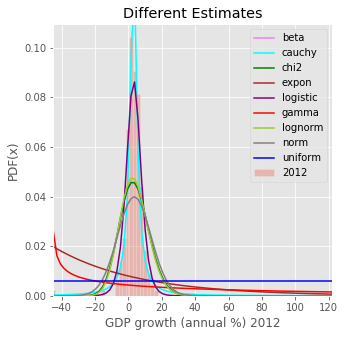

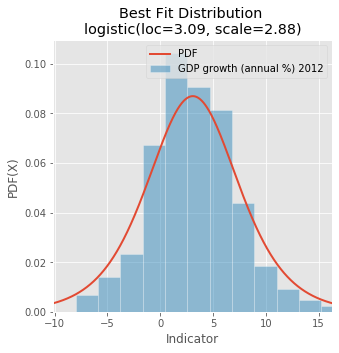

In [115]:
fit_distribution_indicator_year(country_df, ["NY.GDP.MKTP.KD.ZG"], "2012")

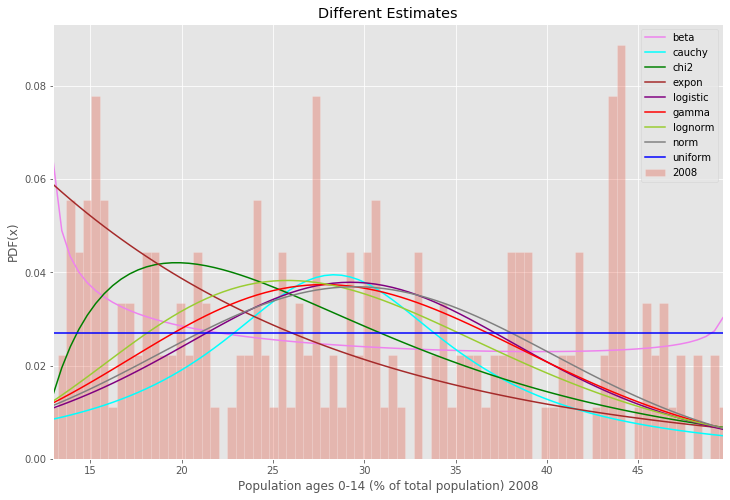

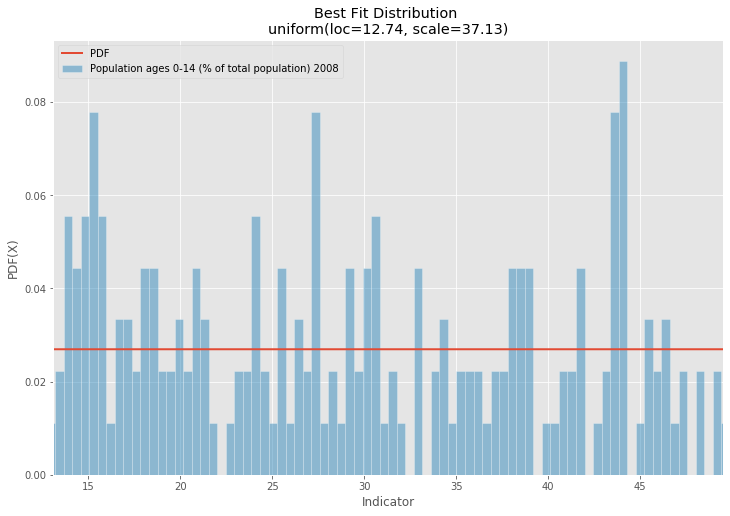

In [156]:
fit_distribution_indicator_year(country_df, ["SP.POP.0014.TO.ZS"], "2008")

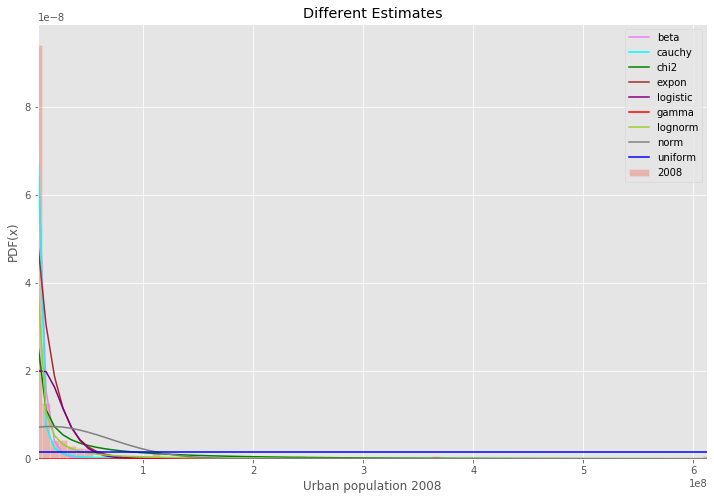

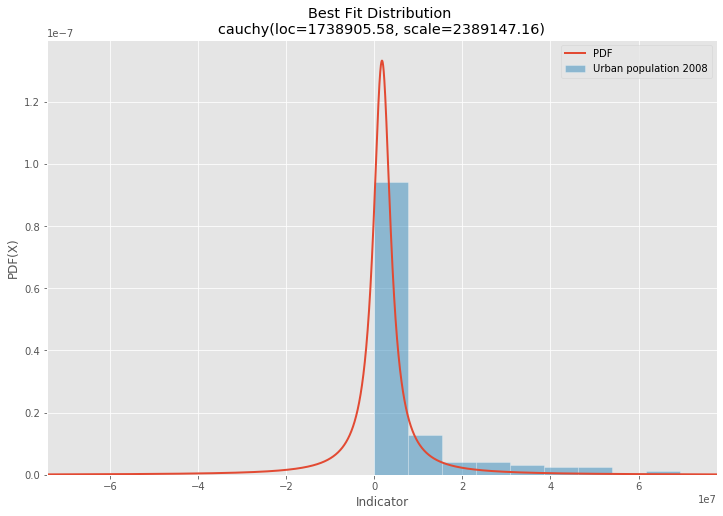

In [158]:
fit_distribution_indicator_year(country_df, ["SP.URB.TOTL"], "2008")

In [6]:
confidence = [0.99, 0.95, 0.9]

def confidence_interval(df, year, indicator_code, confidence):
    
    # calculates the confidence of the population mean using T-Distribution
    
    temp = df[["Country Name", "Country Code", "Indicator Name", "Indicator Code", year]]
    name = temp[temp["Indicator Code"] == indicator]["Indicator Name"].iloc[0]
    temp = temp[temp["Indicator Code"] == indicator]
    data = temp[temp.columns[-1]].values

    data = data[~np.isnan(data)] 

    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    for c in confidence:
        print(c)
        h = se * st.t.ppf((1 + c) / 2., n-1)
        print(m-h,m,m+h)

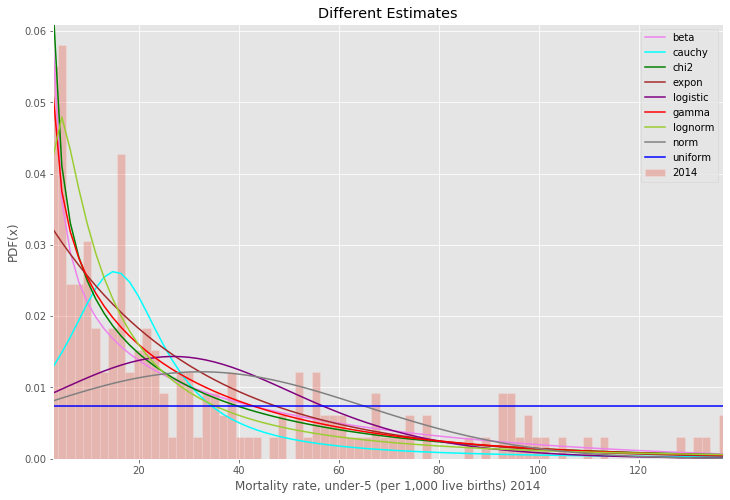

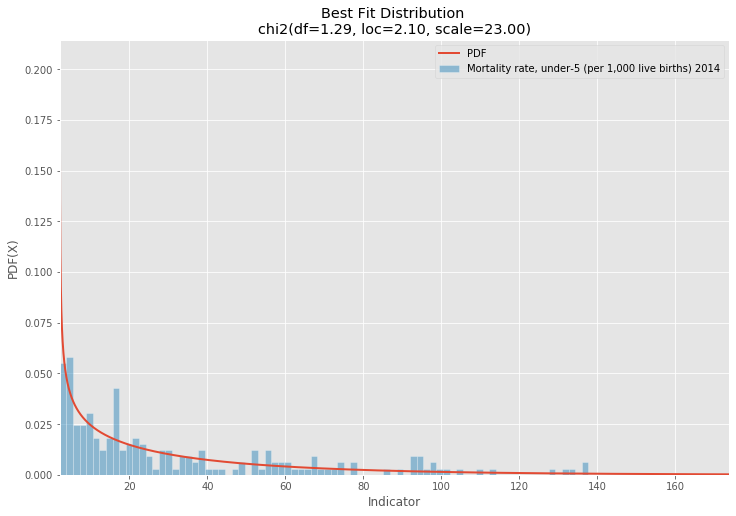

In [161]:
fit_distribution_indicator_year(country_df, ["SH.DYN.MORT"], "2014")

### Ratio of Variances:

In [7]:
def ratio_of_variance(df, year1, year2, indicator_code, confidence, **kwargs):
    
    temp = df[["Country Name", "Country Code", "Indicator Name", "Indicator Code", year1]]
    name = temp[temp["Indicator Code"] == indicator]["Indicator Name"].iloc[0]
    temp = temp[temp["Indicator Code"] == indicator]
    data1 = temp[temp.columns[-1]].values
    data1 = data1[~np.isnan(data1)]
    
    temp = df[["Country Name", "Country Code", "Indicator Name", "Indicator Code", year2]]
    name = temp[temp["Indicator Code"] == indicator]["Indicator Name"].iloc[0]
    temp = temp[temp["Indicator Code"] == indicator]
    data2 = temp[temp.columns[-1]].values
    data2 = data2[~np.isnan(data2)]
    
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    
    l = st.f.ppf()
    
    s1 = np.var(data1, ddof = 1)
    s2 = np.var(data2, ddof = 1)
    
    intervals = []
    
    for c in confidence:
        lower = st.f.ppf((1-c)/2, n1-1, n2-1)
        higher = st.f.ppf((1+c)/2, n1-1, n2-1)
        intervals.append((s1/(lower*s2),s1/(higher*s2)))
        
    return intervals

### People Aged Between 14-60

- SP.POP.1564.TO

In [39]:
temp = country_df[country_df['Indicator Code'] == "SP.POP.1564.TO"]

In [41]:
temp = temp[temp.columns[-20:]]

In [42]:
temp.shape

(217, 20)

In [37]:
temp.shape

(311176, 20)

In [118]:
def descriptiveStats(df):
    
    for i in range(1,21):
        
        data = df[df.columns[-i]]
        print(2020-i+1)
        print("Descriptive Stats:")
        print("Mean:",data.mean())
        print("Std:",data.std())
        print("Median:",data.median())
        print("Skewness:",data.skew())
        print("Kurtosis:",data.kurtosis())
        print("Coefficient of Variation:",data.std()/data.mean())
        print("Max:",data.max())
        print("Min:",data.min())
        print()

In [119]:
descriptiveStats(temp)

2020
Descriptive Stats:
Mean: nan
Std: nan
Median: nan
Skewness: nan
Kurtosis: nan
Coefficient of Variation: nan
Max: nan
Min: nan

2019
Descriptive Stats:
Mean: 25836285.124352332
Std: 99736520.68179014
Median: 5577973.0
Skewness: 8.543607135982136
Kurtosis: 77.75402133119128
Coefficient of Variation: 3.8603274503958067
Max: 988510153.0
Min: 61636.0

2018
Descriptive Stats:
Mean: 25591003.088082902
Std: 99249655.23118548
Median: 5478142.0
Skewness: 8.565114539731868
Kurtosis: 78.15515456176688
Coefficient of Variation: 3.8783026554126594
Max: 991653198.0
Min: 60505.0

2017
Descriptive Stats:
Mean: 25344398.772020724
Std: 98745161.26487081
Median: 5378323.0
Skewness: 8.588335694571807
Kurtosis: 78.59844403500718
Coefficient of Variation: 3.8961335067802754
Max: 994288090.0
Min: 59416.0

2016
Descriptive Stats:
Mean: 25087706.409326427
Std: 98145315.90721677
Median: 5359413.0
Skewness: 8.610896301138526
Kurtosis: 79.04676948629488
Coefficient of Variation: 3.912088028530618
Max: 9954340

In [122]:
def boxPlot(df):
    data_2005 = df['2005'].values
    data_2015 = df['2015'].values
    
    data_2015 = data_2015[~np.isnan(data_2015)]
    data_2005 = data_2005[~np.isnan(data_2005)]
    fig,ax = plt.subplots(figsize = (7,7))
    ax.boxplot([data_2005, data_2015],labels = ['2005','2015'])
    ax.set_xlabel("Year")
    ax.set_ylabel("Population aged between 15-64")
    ax.set_title("Box-Plot")
    fig.savefig("box.png",dpi = 200)

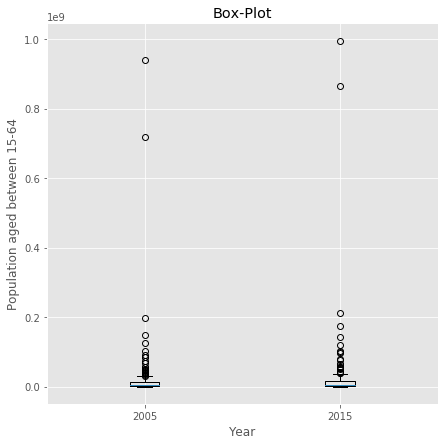

In [123]:
boxPlot(temp)

In [120]:
def histogram(df):
    data_2005 = df['2005'].values
    data_2015 = df['2015'].values
    
    data_2015 = data_2015[~np.isnan(data_2015)]
    data_2005 = data_2005[~np.isnan(data_2005)]
    
    fig1,ax1 = plt.subplots(figsize = (7,7))
    ax1.hist(data_2015,bins = 70)
    ax1.set_xlabel("2015")
    ax1.set_ylabel("Population aged between 15-64")
    ax1.set_title("Histogram-Plot")
    fig1.savefig('hist_2015.png',dpi = 200)
    
    fig1,ax1 = plt.subplots(figsize = (7,7))
    ax1.hist(data_2005,bins = 70)
    ax1.set_xlabel("2005")
    ax1.set_ylabel("Population aged between 15-64")
    ax1.set_title("Histogram-Plot")
    fig1.savefig('hist_2005.png',dpi = 200)

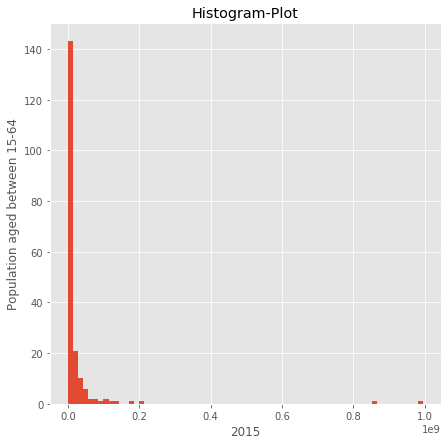

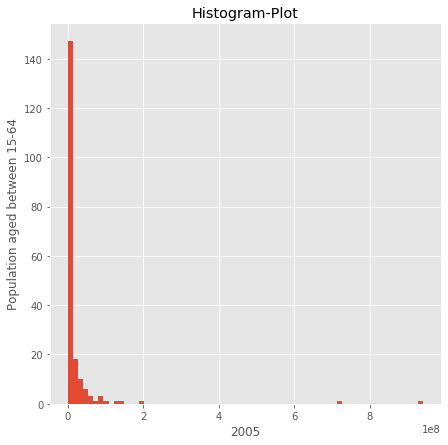

In [121]:
histogram(temp)

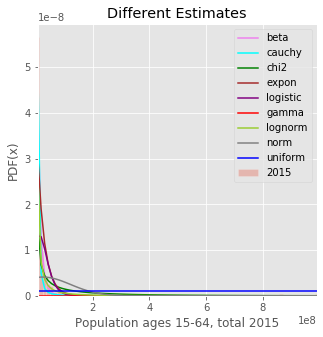

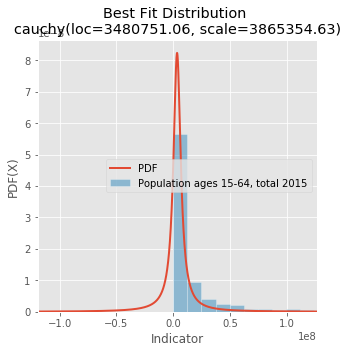

In [116]:
fit_distribution_indicator_year(country_df, ["SP.POP.1564.TO"], "2015")